In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from numpy import genfromtxt
from numpy import linalg as LA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from numpy import ma

## import data

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
#dfx = df.loc[:, ' timedelta':' abs_title_sentiment_polarity']
#dfy = df.loc[:, ' shares']

In [4]:
df = df.loc[:, ' timedelta':]
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Exploratory Data Analysis (EDA)

### Feature distribution

In [67]:
#datax = dfx.as_matrix(columns=None)
#datay = dfy.as_matrix(columns=None)

data = df.as_matrix(columns=None)

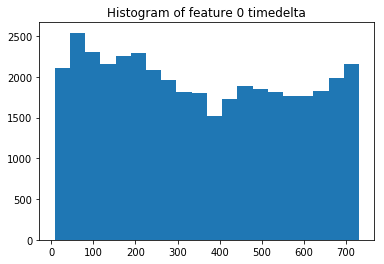

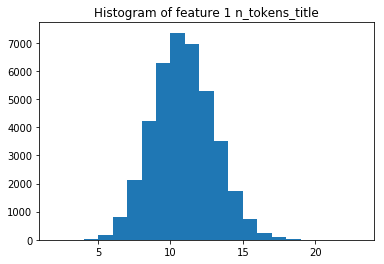

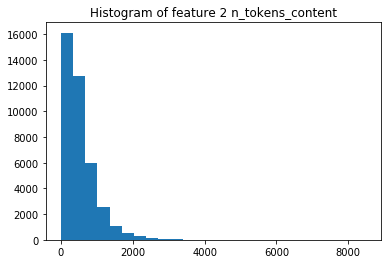

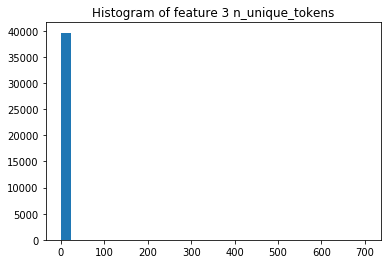

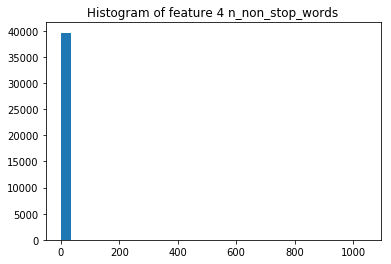

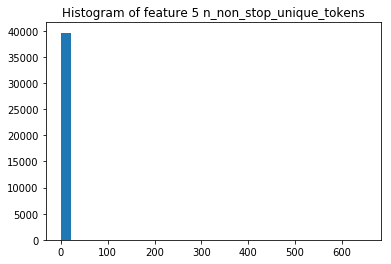

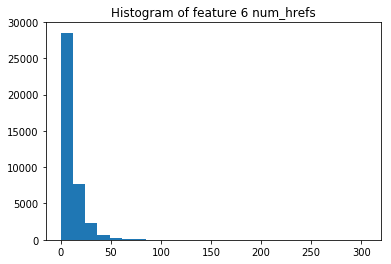

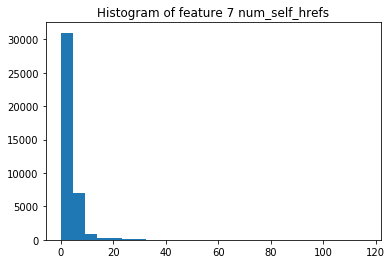

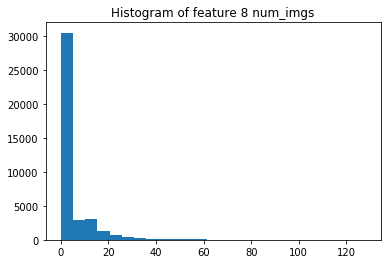

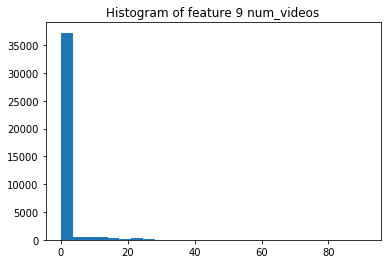

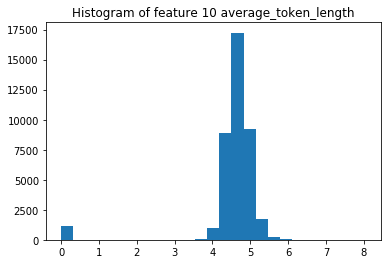

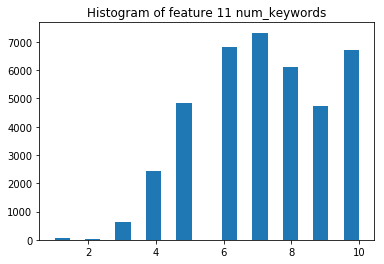

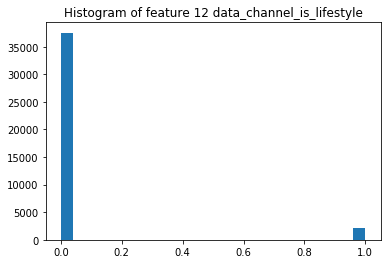

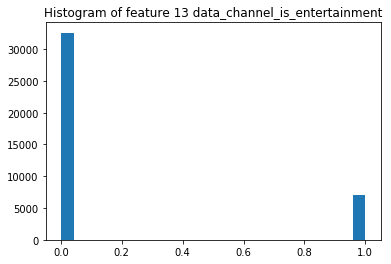

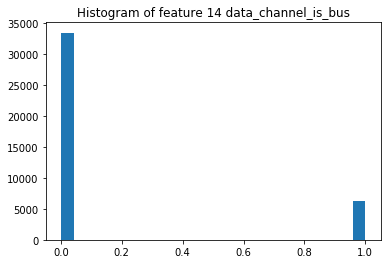

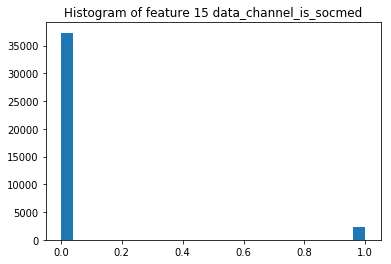

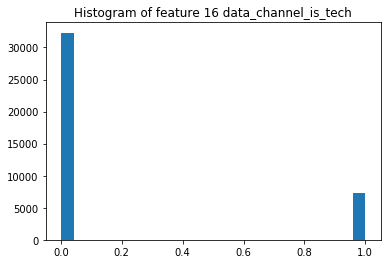

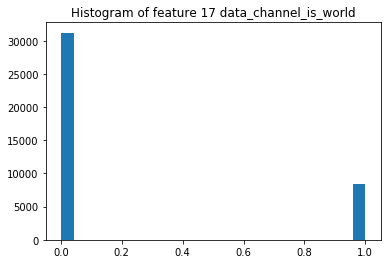

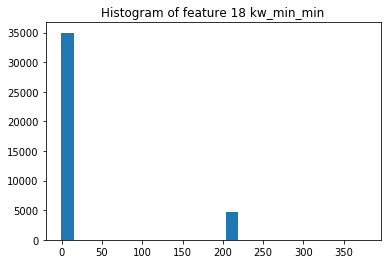

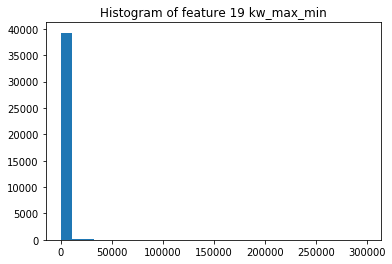

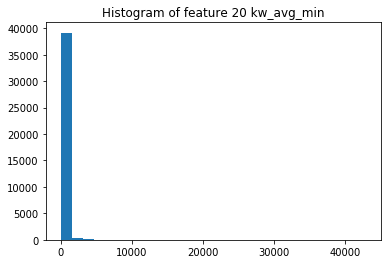

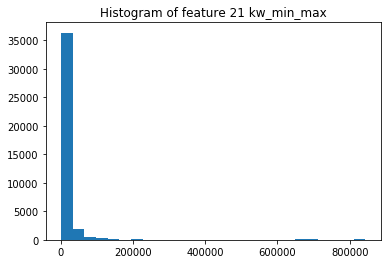

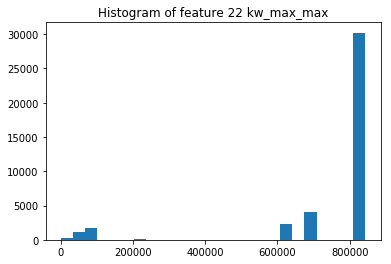

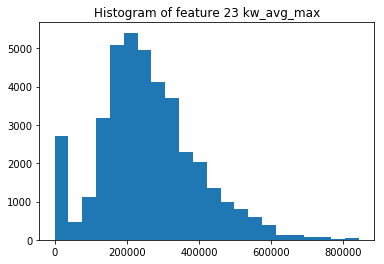

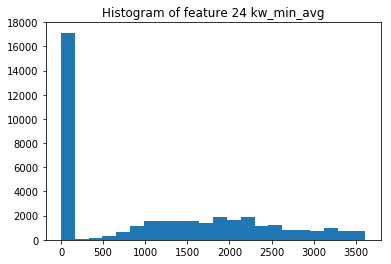

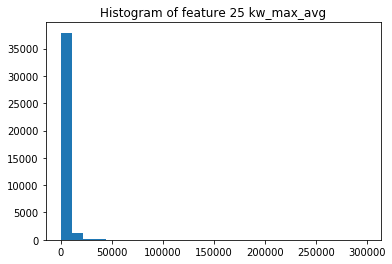

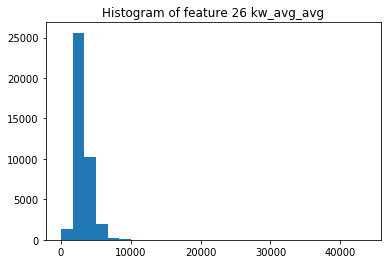

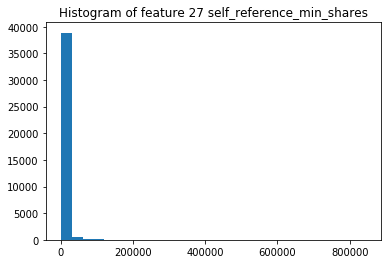

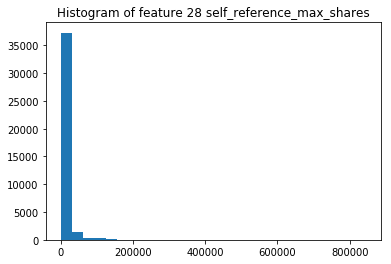

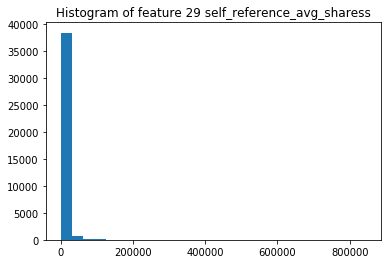

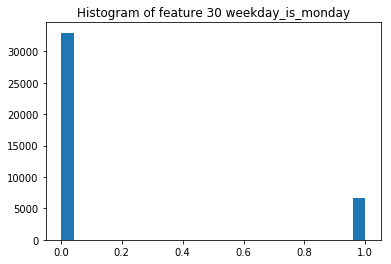

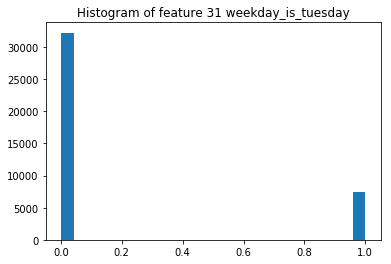

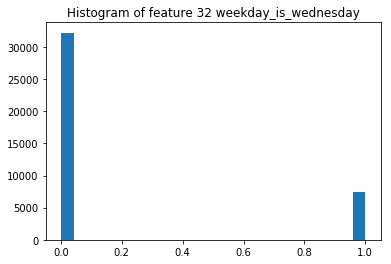

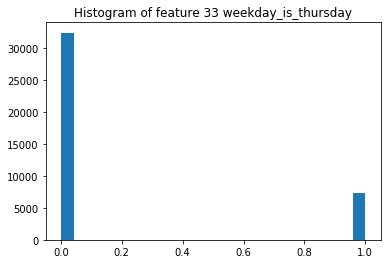

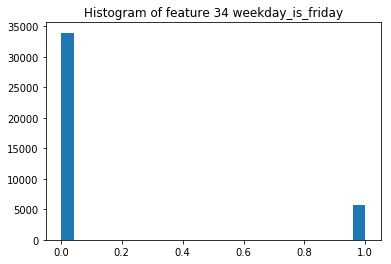

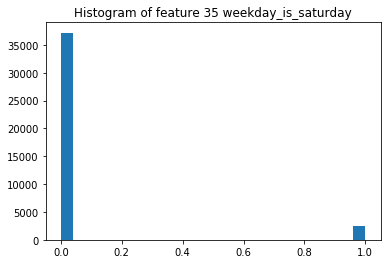

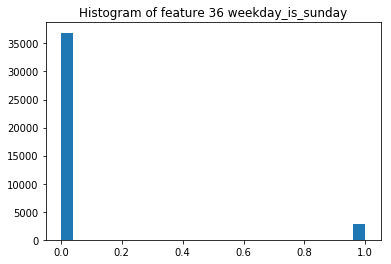

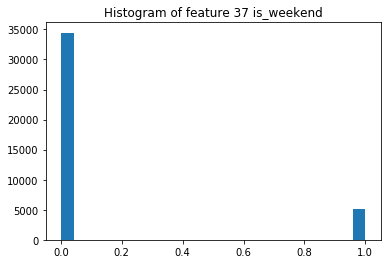

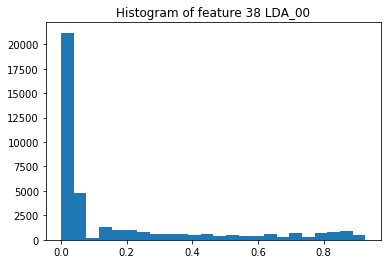

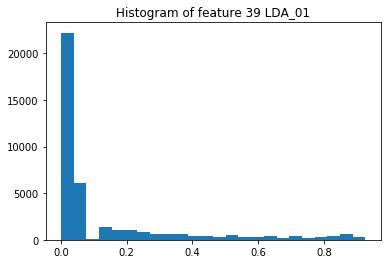

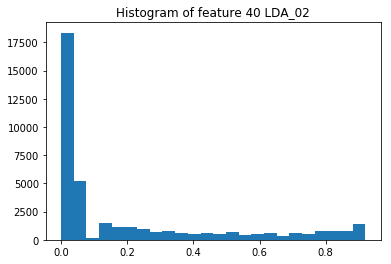

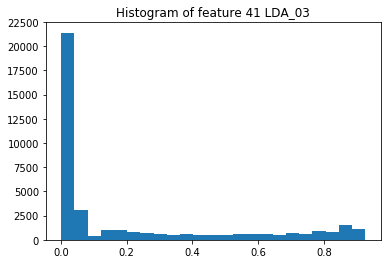

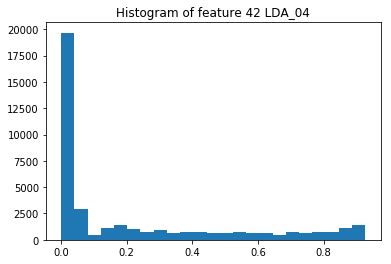

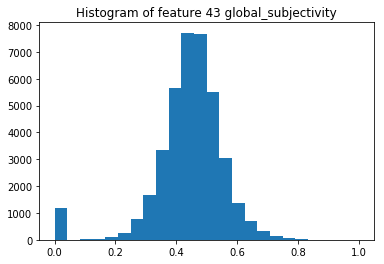

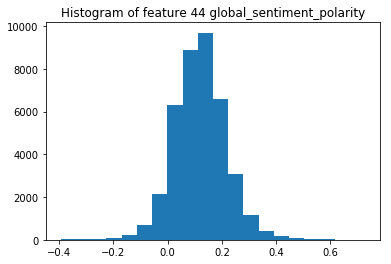

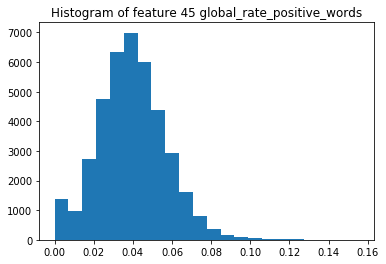

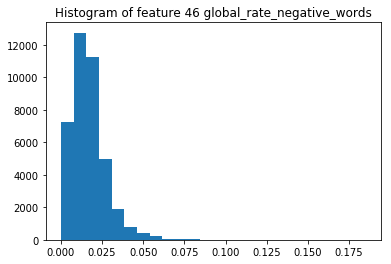

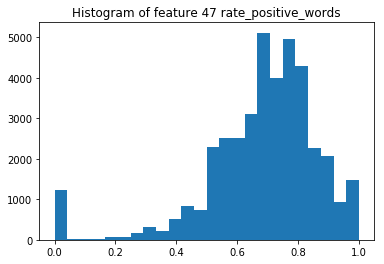

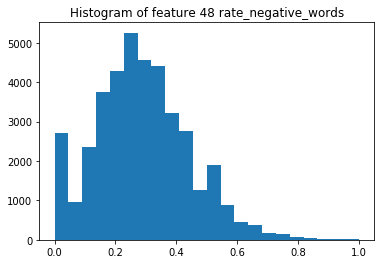

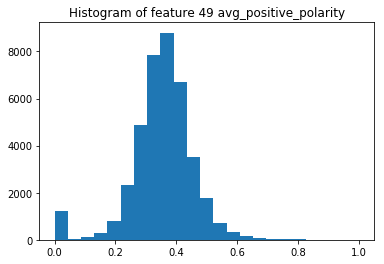

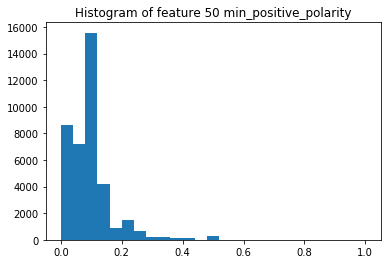

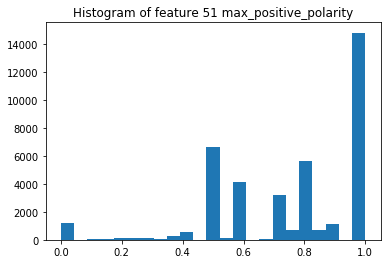

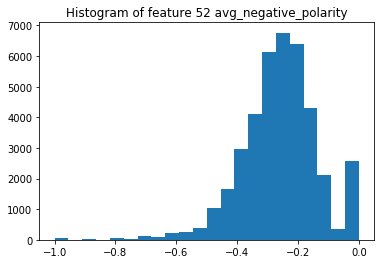

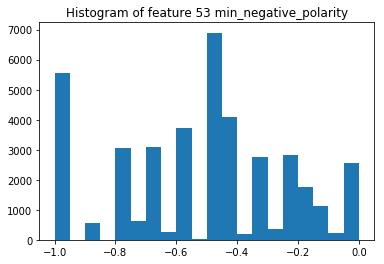

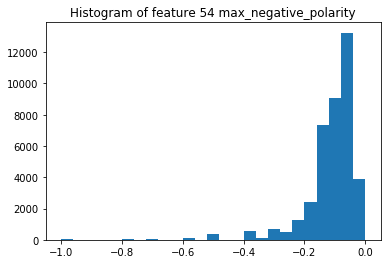

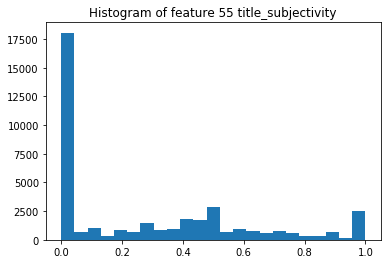

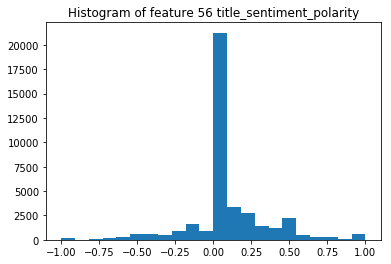

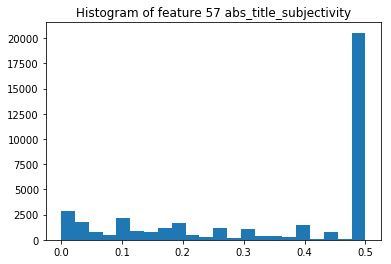

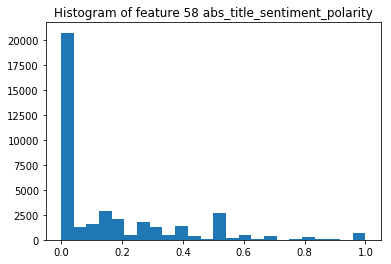

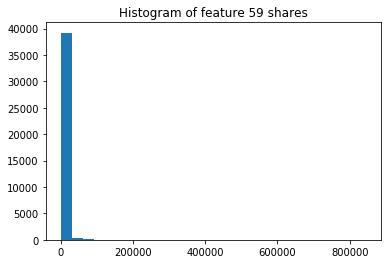

In [6]:
#plot histogram
for i in range(0,data.shape[1]):
    plt.hist(data[:,i], bins='doane')  # arguments are passed to np.histogram
    plt.title("Histogram of feature "+str(i) + df.columns[i])
    plt.show()

In [68]:
# remove outlier in var “n_unique_tokens”, “n_non_stop_words”, and “n_non_stop_unique_tokens”
data = data[data[:,3]<1]

In [69]:
data.shape

(39643, 60)

In [70]:
df.shape

(39644, 60)

In [71]:
# eliminate missing value
c = np.array([10,19,43,44,45,47,48,49,52])
for i in c:
    data = data[data[:,i]!=0]
data.shape

(36274, 60)

In [72]:
# reduce the skewness
# if the data contains no 0s, use log, else use sqrt

c = np.array([2,6,7,8,9,21,25,26,27,28,29,38,39,40,41,42,46,59])
for i in c:
    if (LA.norm(data[:,i],0)==data[:,i].shape):
        data[:,i] = np.log(data[:,i])
    else:
        data[:,i] = np.sqrt(data[:,i])

In [27]:
# eliminate unvalid data
#c = np.array([18,20,22,24])
#data = np.delete(data, c, 1)
#data.shape

(36274, 56)

### Boolean feature effects

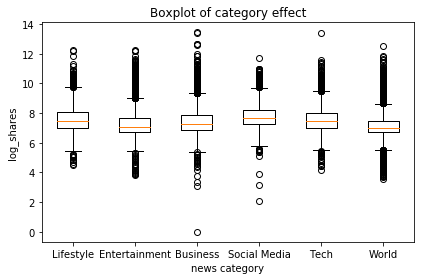

In [83]:
labels = ['Lifestyle','Entertainment','Business','Social Media','Tech','World']
plot_set1 = data[data[:,12]==1][:,59] 
plot_set2 = data[data[:,13]==1][:,59]
plot_set3 = data[data[:,14]==1][:,59]
plot_set4 = data[data[:,15]==1][:,59]
plot_set5 = data[data[:,16]==1][:,59]
plot_set6 = data[data[:,17]==1][:,59]
plotdata = [plot_set1, plot_set2, plot_set3, plot_set4, plot_set5,plot_set6]
plt.boxplot(plotdata,labels=labels)
plt.xlabel('news category')
plt.ylabel('log_shares')
plt.title('Boxplot of category effect')
plt.tight_layout()
plt.show()

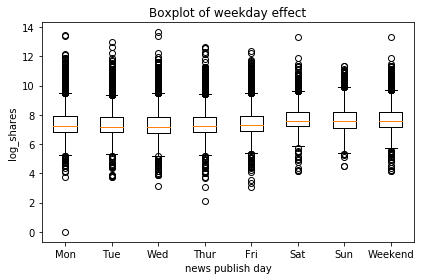

In [84]:
labels = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun','Weekend']
plot_set1 = data[data[:,30]==1][:,59] 
plot_set2 = data[data[:,31]==1][:,59]
plot_set3 = data[data[:,32]==1][:,59]
plot_set4 = data[data[:,33]==1][:,59]
plot_set5 = data[data[:,34]==1][:,59]
plot_set6 = data[data[:,35]==1][:,59]
plot_set7 = data[data[:,36]==1][:,59]
plot_set8 = data[data[:,37]==1][:,59]
plotdata = [plot_set1, plot_set2, plot_set3, plot_set4, plot_set5,plot_set6,plot_set7,plot_set8]
plt.boxplot(plotdata,labels=labels)
plt.xlabel('news publish day')
plt.ylabel('log_shares')
plt.title('Boxplot of weekday effect')
plt.tight_layout()
plt.show()

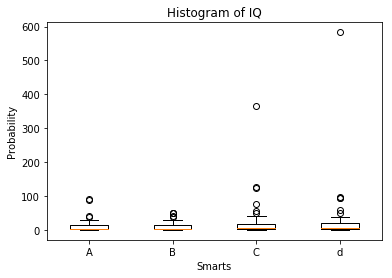

In [41]:
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = ['A','B','C','d']
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
plt.boxplot(data, labels=labels)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')

plt.show()

In [45]:
data[data[:,12]==1]

IndexError: index 12 is out of bounds for axis 1 with size 4